# U.S. Medical Insurance Costs

In [71]:
import csv

file_path = r'C:\Users\Oskar\OneDrive - IU International University of Applied Sciences\Dokumente\04_Bildung\Studium 2.0\01_codecademy\Repository_Insurance Project\Insurance_Project-\starter-files\insurance.csv'

# Create an empty dictionary to hold the data
csv_data = {}

# Open the CSV file
with open(file_path, mode='r', newline='', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file) # Read the CSV into a dictionary format
    
    # Iterate through each row in the CSV
    id = 0
    for row in csv_reader:
        csv_data[id] = row
        id +=1
        
    print(csv_data)


{0: {'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}, 1: {'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}, 2: {'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}, 3: {'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}, 4: {'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552'}, 5: {'age': '31', 'sex': 'female', 'bmi': '25.74', 'children': '0', 'smoker': 'no', 'region': 'southeast', 'charges': '3756.6216'}, 6: {'age': '46', 'sex': 'female', 'bmi': '33.44', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '8240.5896'}, 7: {'age': '37', 'sex': 'female', 'bmi': '27.74', 'children': '3', 'smoker': 'no', 'region'

Scoping of the analysis project

Step 1: 
Get an overview of the whole dataset via averages of numerical and proportions of categorical data. 

Step 2: visualize data

Step 3: find connection betweens different variables

****
Step 1
****
Get an overview of the whole dataset via averages of numerical and proportions of categorical data. 

In [ ]:
#generic function for calculating all averages in the given dataset
def average (data, variable_name):
    """
    This function will take in the whole csv_data and calculate the average for the given variable.
    """
    try: 
        avg = 0
        for record in data:
            avg += float(data[record][variable_name])
        avg /= len(data)
        return avg
    except ValueError: #non-numerical input variables will be handled here
        avg = "Non numerical variable. Average calculation failed."
        return avg

print("avg Age: " + str(average(csv_data, "age")))
print("avg BMI: " + str(average(csv_data, "bmi")))
print("avg children: " + str(average(csv_data, "children")))
print("avg charges: " + str(average(csv_data, "charges")))

def proportion (data, variable_name):
    """
    This function will take in the whole csv_data and calculate the proportions of the given categorical variable.
    """
    cat_count = {}
    cat_proportion = {}
    try: 
        for record in data:
            category = data[record][variable_name]
            if category in cat_count: #check if the category exists. If not create it with a count of 1. If yes increase count by 1. 
                cat_count[category] +=1
            else: 
                cat_count[category] = 1

        cat_proportion = [cat_count[category]/len(data) for category in cat_count]

        return cat_proportion
    except ValueError: #non-numerical input variables will be handled here
        cat_proportions = "Non categorical data. Proportion calculation failed."
        return cat_proportions

print ("Proportion sex : " + str(proportion(csv_data, "sex")))
print ("Proportion smoker : " + str(proportion(csv_data, "smoker")))
print ("Proportion region: " + str(proportion(csv_data, "region")))

avg Age: 39.20702541106129
avg BMI: 30.663396860986538
avg children: 1.0949177877429
avg charges: 13270.422265141257
Proportion sex : [0.4947683109118087, 0.5052316890881914]
Proportion smoker : [0.20478325859491778, 0.7952167414050823]
Proportion region: [0.2428998505231689, 0.27204783258594917, 0.2428998505231689, 0.242152466367713]


****
Step 2
****
visualize data

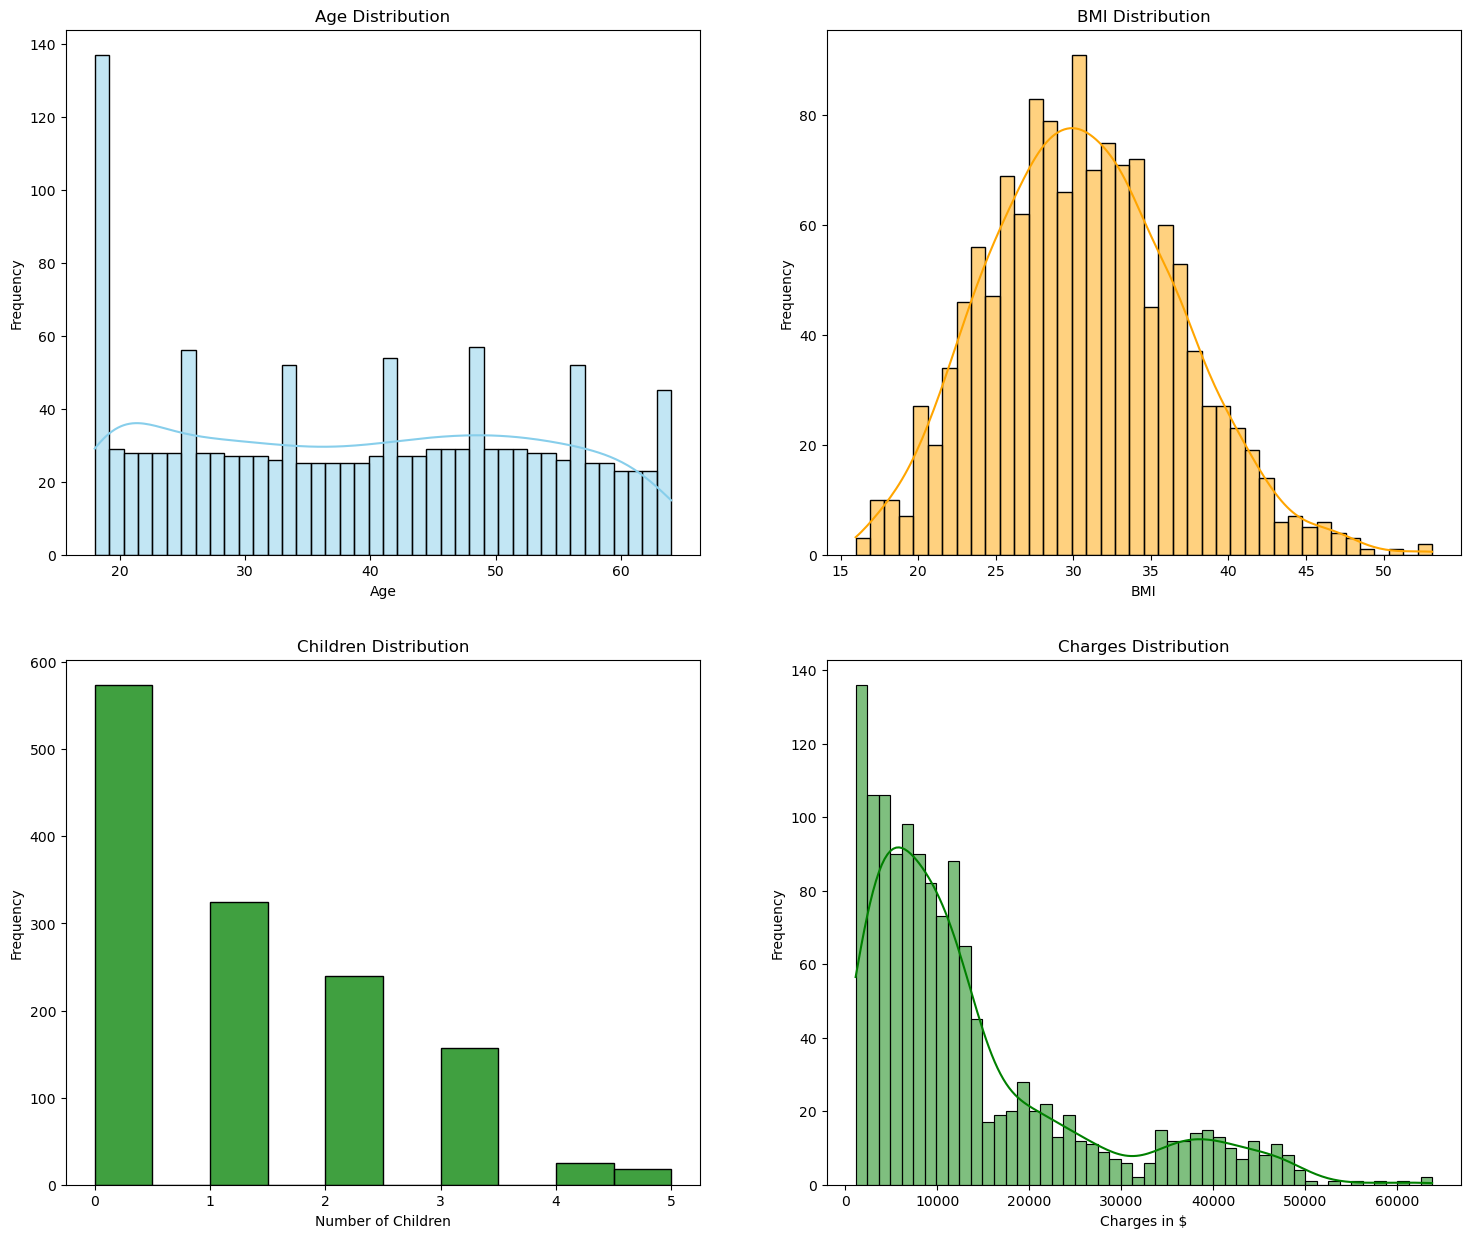

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_distribution(data):
    """
    This 
    """
    # Extract relevant columns
    age = [float(data[record]['age']) for record in data]
    bmi = [float(data[record]['bmi']) for record in data]
    children = [int(data[record]['children']) for record in data]
    charges = [float(data[record]['charges']) for record in data]

    # Create a figure and axes for subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 15))

    # Plot Age distribution
    sns.histplot(age, kde=True, ax=axes[0,0], color='skyblue', bins=40)
    axes[0,0].set_title('Age Distribution')
    axes[0,0].set_xlabel('Age')
    axes[0,0].set_ylabel('Frequency')

    # Plot BMI distribution
    sns.histplot(bmi, kde=True, ax=axes[0,1], color='orange', bins=40)
    axes[0,1].set_title('BMI Distribution')
    axes[0,1].set_xlabel('BMI')
    axes[0,1].set_ylabel('Frequency')

    # Plot Children distribution
    sns.histplot(children, kde=False, ax=axes[1,0], color='green', bins=10)
    axes[1,0].set_title('Children Distribution')
    axes[1,0].set_xlabel('Number of Children')
    axes[1,0].set_ylabel('Frequency')

    # Plot Charges distribution
    sns.histplot(charges, kde=True, ax=axes[1,1], color='green', bins=50)
    axes[1,1].set_title('Charges Distribution')
    axes[1,1].set_xlabel('Charges in $')
    axes[1,1].set_ylabel('Frequency')

visualize_distribution(csv_data)
